In [1]:
import pandas as pd 
import numpy as np 
import sklearn  
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Data Analysis


## 1) We will delve into the characteristics of the input features through determining which are categorical or numerical.
#### • Identifying the number of unique values for each feature. 
#### • Identifying the data types for each feature. 
#### • Gathering summary statistics of numerical features. 
## 2) We will be to uncover the targeted demographic and user segmentations for the Bank's marketing efforts.
#### • Getting distribution of client's data: age, job, marital status, default, housing, loan.
#### • Understanding proportion of unique values within interested features, that correspond with target y (yes or no) 
#### • Checking if the dataset is balanced based on the proportion of the binary classifications (y = yes & y = no) 

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<AxesSubplot:ylabel='Housing'>

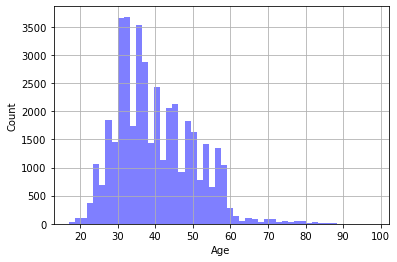

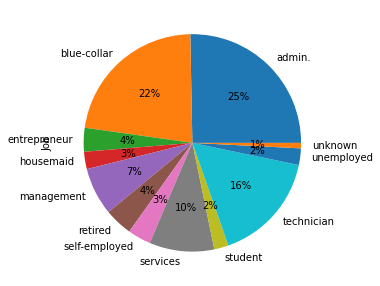

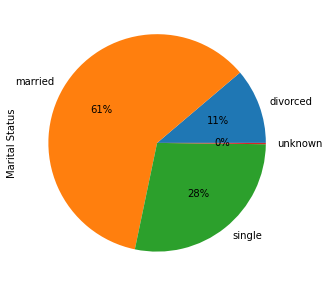

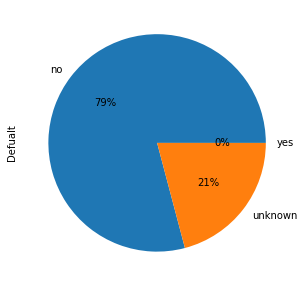

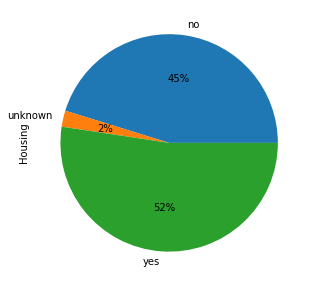

In [6]:
plt.figure(0)
plt.rcParams["figure.figsize"] = (10,5)
df['age'].hist(bins = 50, color = 'blue', alpha = 0.5)

plt.ylabel('Count')
plt.xlabel('Age');

plt.figure(1)
df.job.str.get_dummies().sum().plot.pie(label='Job', autopct='%1.0f%%')
plt.figure(2)
df.marital.str.get_dummies().sum().plot.pie(label='Marital Status', autopct='%1.0f%%')
plt.figure(3)
df.default.str.get_dummies().sum().plot.pie(label='Defualt', autopct='%1.0f%%')
plt.figure(4)
df.housing.str.get_dummies().sum().plot.pie(label='Housing', autopct='%1.0f%%')

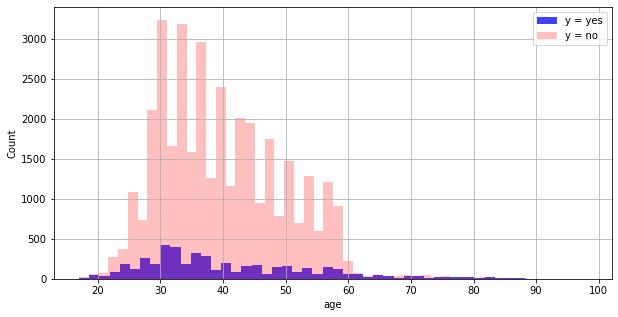

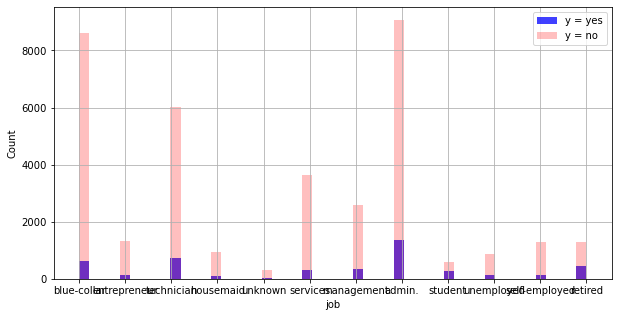

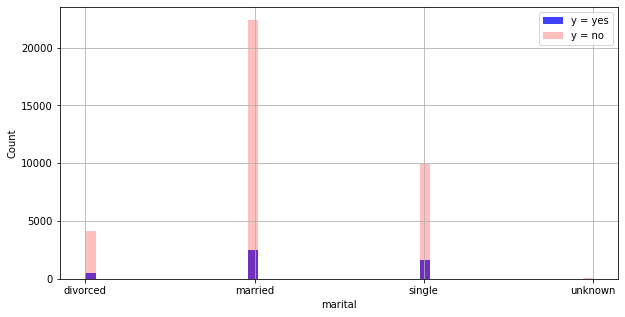

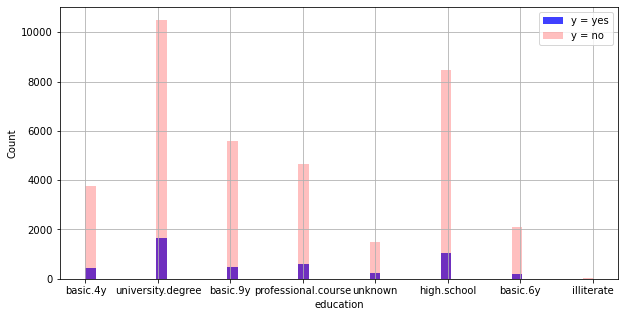

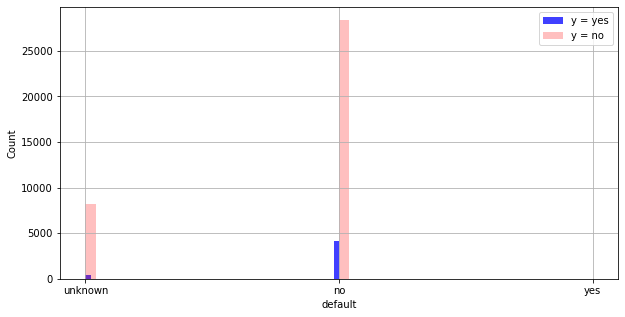

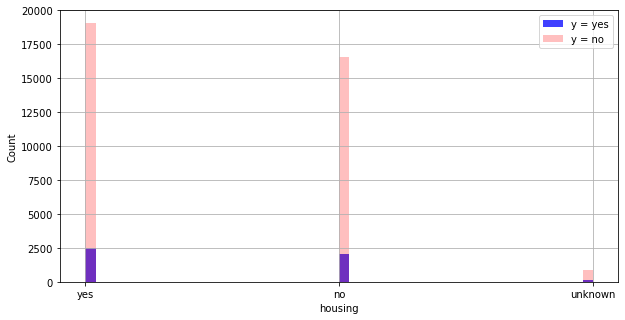

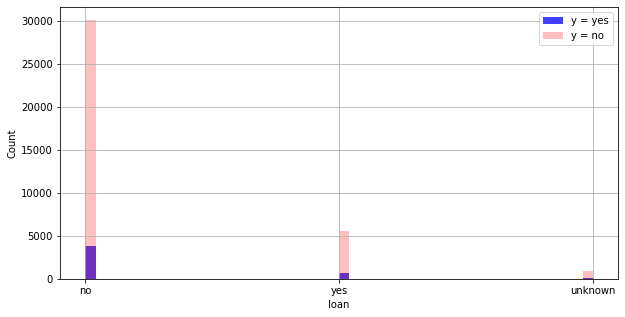

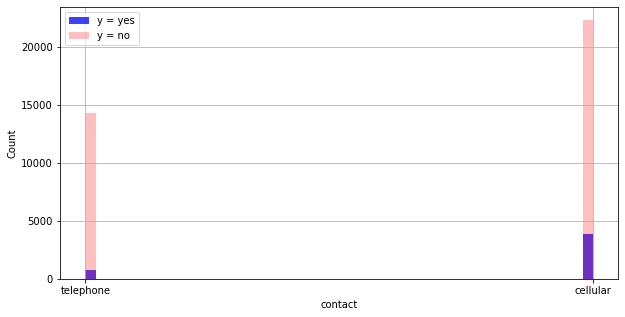

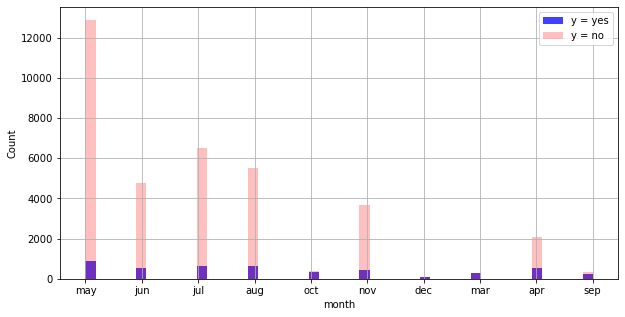

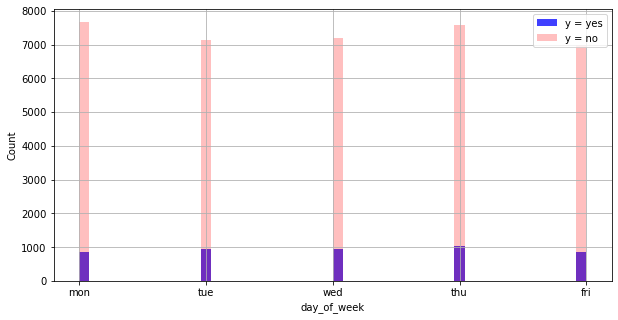

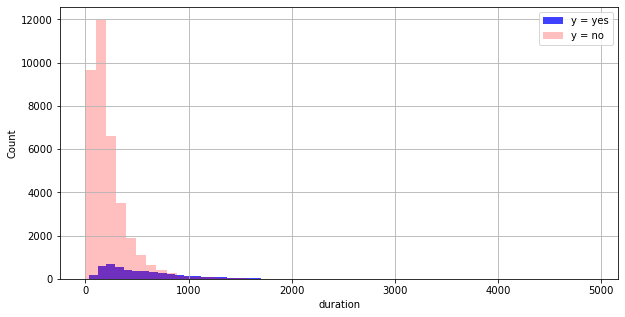

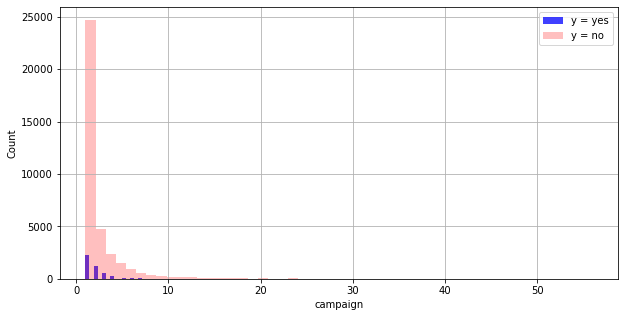

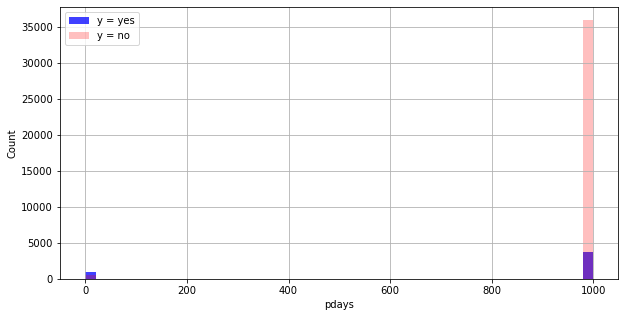

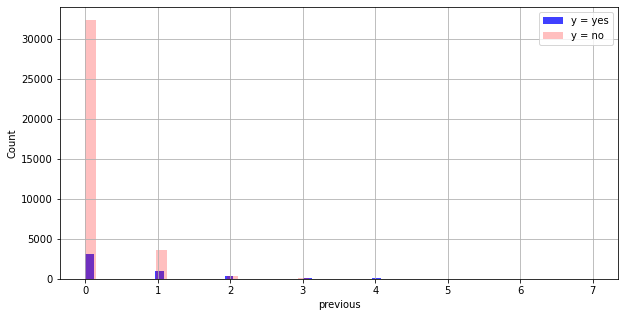

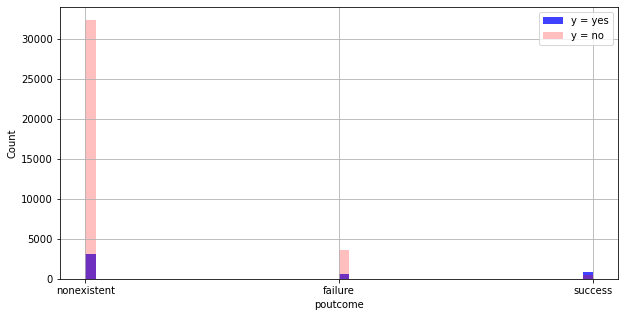

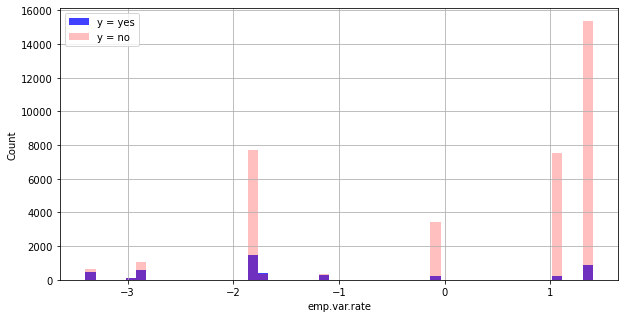

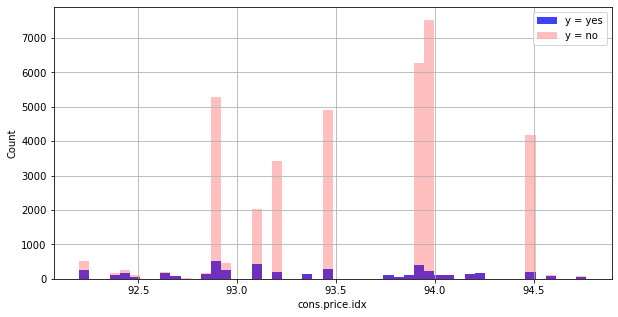

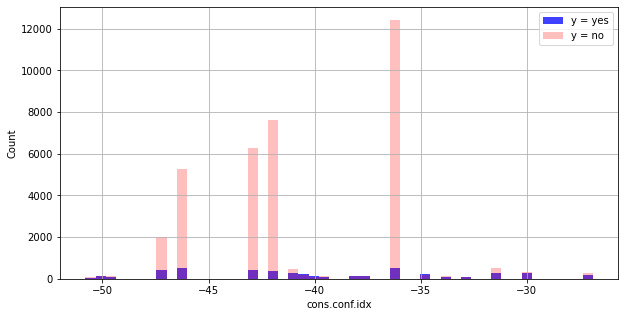

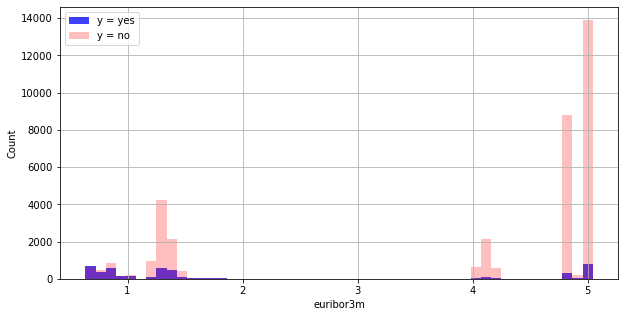

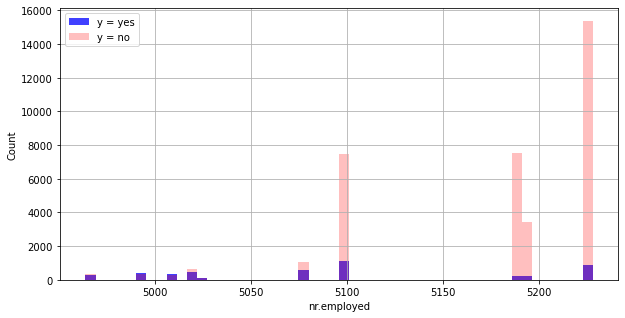

In [7]:
counter = 0 
for column in df:
    if column != 'y': 
        plt.figure(counter)
        plt.rcParams["figure.figsize"] = (10,5)
        df[df['y'] == 'yes'][column].hist(bins = 50, label = 'y = yes', color = 'blue', alpha = 0.75)
        df[df['y'] == 'no'][column].hist(bins = 50, label = 'y = no', color = 'red', alpha = 0.25)
        plt.legend()

        plt.ylabel('Count')
        plt.xlabel(column);
        counter += 1 

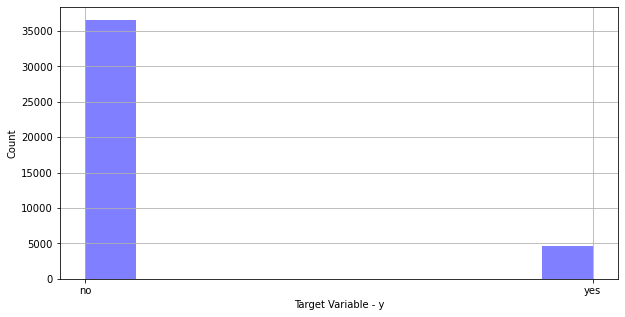

In [8]:
plt.figure(0)
plt.rcParams["figure.figsize"] = (10,5)
df['y'].hist(bins = 10, color = 'blue', alpha = 0.5)

plt.ylabel('Count')
plt.xlabel('Target Variable - y');

## Data Preprocessing 
#### 1) Standard Scalar - Standardizing Numerical Features 
#### 2) Converting cateogircal variables into dummy/indicator variables 
#### 3) Oversampling - Preventing Imbalance in training set 

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize Numerical Features 
scaler = StandardScaler()
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                'nr.employed']] = scaler.fit_transform(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                'nr.employed']])

# Encode the cateogrical variables using Pandas encoder.
# Convert categorical variable into dummy/indicator variables 
df_pp = df.copy()
df_pp['y'] = df_pp['y'].map({'yes': 1, 'no': 0})
df_pp = pd.get_dummies(df_pp)
df_pp.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split

X = df_pp.drop('y', axis = 1) 

y = df_pp['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023) 

In [11]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#Over Sampling to prevent bias for class which has more samples 
ns = RandomOverSampler(random_state=2023)
X_train_ns,y_train_ns = ns.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_ns.value_counts())

0    29234
1     3716
Name: y, dtype: int64
0    29234
1    29234
Name: y, dtype: int64


## 1.0 Model Training - Decision Tree Classifier (Baseline)

In [12]:
from sklearn.tree import DecisionTreeClassifier 

dtree = DecisionTreeClassifier(random_state = 2023) 
dtree.fit(X_train_ns, y_train_ns) 

dtree_preds = dtree.predict(X_test) 

## 1.0 Model Testing - Decision Tree Classifier (Baseline)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7314
           1       0.52      0.52      0.52       924

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



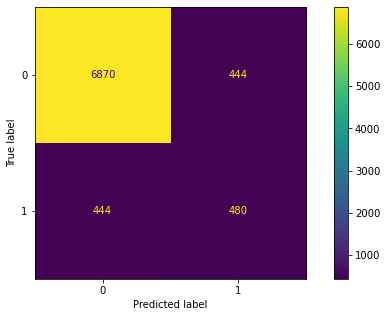

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, dtree_preds))

confusion_matrix = confusion_matrix(y_test, dtree_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = dtree.classes_)
cm_display.plot()
plt.show()

## 2.0 Model Training - Logistic Regression Classifier

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 2023, max_iter=10000)
logreg = logreg.fit(X_train_ns, y_train_ns)

logreg_preds = logreg.predict(X_test)

## 2.0 Model Testing - Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7314
           1       0.43      0.88      0.58       924

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238



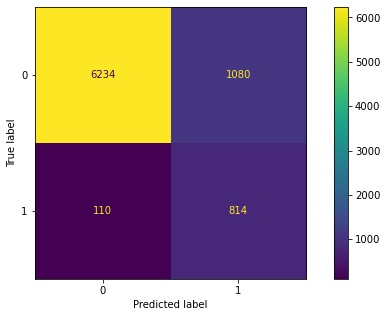

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, logreg_preds))

confusion_matrix = confusion_matrix(y_test, logreg_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = logreg.classes_)
cm_display.plot()
plt.show()

## 3.0 Model Training - Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state = 2023)
rforest.fit(X_train_ns, y_train_ns)

rforest_preds = rforest.predict(X_test)

## 3.0 Model Testing - Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7314
           1       0.61      0.60      0.61       924

    accuracy                           0.91      8238
   macro avg       0.78      0.78      0.78      8238
weighted avg       0.91      0.91      0.91      8238



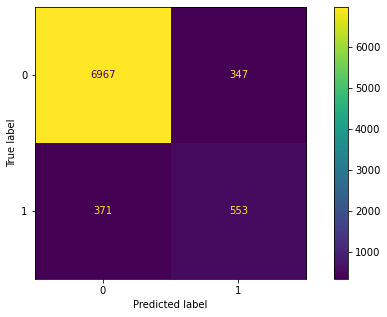

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, rforest_preds))

confusion_matrix = confusion_matrix(y_test, rforest_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = rforest.classes_)
cm_display.plot()
plt.show()

## 4.0 Model Training - XGBoost Classifier 
#### • We want to find optimal parameters of XGBoost Classifier using GridSearch. 

In [18]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


search_space = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
} 

xgb_cl = xgb.XGBClassifier(random_state = 2023)
xgb_cl.fit(X_train_ns, y_train_ns)

GS_xgb_cl = GridSearchCV(estimator = xgb_cl, param_grid = search_space, cv = 5).fit(X_train_ns, y_train_ns)

xgb_preds = GS_xgb_cl.best_estimator_.predict(X_test)

## 4.0 Model Testing - XGBoost Classifier 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7314
           1       0.48      0.88      0.62       924

    accuracy                           0.88      8238
   macro avg       0.73      0.88      0.77      8238
weighted avg       0.93      0.88      0.89      8238



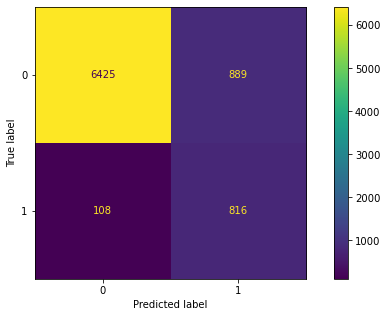

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, xgb_preds))

confusion_matrix = confusion_matrix(y_test, xgb_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = GS_xgb_cl.classes_)
cm_display.plot()
plt.show()

## 5.0 Model Training - Neural Network Classifier 
### (SKLearn Implimentation: Multi-layer Perceptron classifier)

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import GridSearchCV


mlp_cl = MLPClassifier(random_state = 2023, max_iter = 10000) 

search_space = {
    'hidden_layer_sizes': [(50,), (20,50,20)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.05],
    'learning_rate': ['adaptive', 'constant'],
}

GS_mlp_cl = GridSearchCV(estimator = mlp_cl, param_grid = search_space, cv = 5).fit(X_train_ns, y_train_ns)

mlp_preds = GS_mlp_cl.best_estimator_.predict(X_test) 

## 5.0 Model Testing - Neural Network Classifier
### (SKLearn Implimentation: Multi-layer Perceptron classifier.) 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7314
           1       0.48      0.58      0.52       924

    accuracy                           0.88      8238
   macro avg       0.71      0.75      0.73      8238
weighted avg       0.89      0.88      0.89      8238



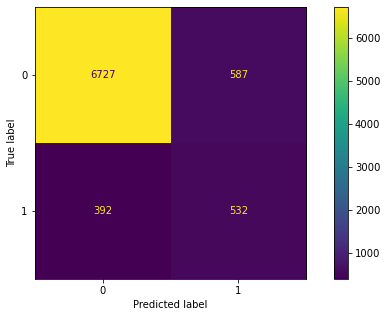

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, mlp_preds))

confusion_matrix = confusion_matrix(y_test, mlp_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = GS_mlp_cl.classes_)
cm_display.plot()
plt.show()

## AUC (Area Under the Curve) and ROC (Receiver Operating Characteristic) 
#### • Evaluating Performance of binary classification models.

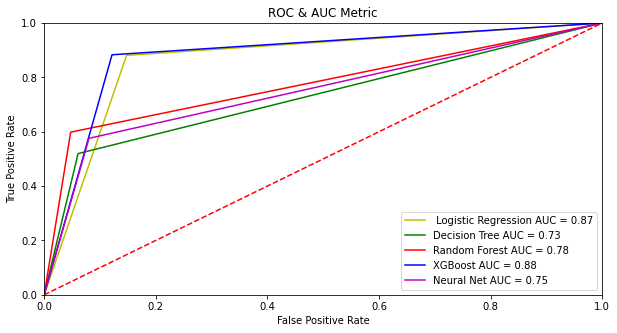

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


logreg_fpr, logreg_tpr, threshold = metrics.roc_curve(y_test, logreg_preds)
logreg_auc = metrics.auc(logreg_fpr, logreg_tpr)

dtree_fpr, dtree_tpr, threshold = metrics.roc_curve(y_test, dtree_preds)
dtree_auc = metrics.auc(dtree_fpr, dtree_tpr)

rforest_fpr, rforest_tpr, threshold = metrics.roc_curve(y_test, rforest_preds)
rforest_auc = metrics.auc(rforest_fpr, rforest_tpr)

xgb_fpr, xgb_tpr, threshold = metrics.roc_curve(y_test, xgb_preds)
xgb_auc = metrics.auc(xgb_fpr, xgb_tpr)

mlp_fpr, mlp_tpr, threshold = metrics.roc_curve(y_test, mlp_preds)
mlp_auc = metrics.auc(mlp_fpr, mlp_tpr)


plt.title('ROC & AUC Metric')

plt.plot(logreg_fpr, logreg_tpr, 'y', label = ' Logistic Regression AUC = %0.2f' % logreg_auc)
plt.plot(dtree_fpr, dtree_tpr, 'g', label = 'Decision Tree AUC = %0.2f' % dtree_auc)
plt.plot(rforest_fpr, rforest_tpr, 'r', label = 'Random Forest AUC = %0.2f' % rforest_auc)
plt.plot(xgb_fpr, xgb_tpr, 'b', label = 'XGBoost AUC = %0.2f' % xgb_auc)
plt.plot(mlp_fpr, mlp_tpr, 'm', label = 'Neural Net AUC = %0.2f' % mlp_auc)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## References 

In [ ]:
"""
Data Manipulation & Preprocessing 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832#:~:text=StandardScaler%20removes%20the%20mean%20and,standard%20deviation%20of%20each%20feature.
https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

Scikit-Learn Models 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390
https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/#:~:text=MLPClassifier%20stands%20for%20Multi%2Dlayer,perform%20the%20task%20of%20classification.
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

Evaluation Techniques  
Printing Classification Matrix 
https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
https://www.youtube.com/watch?v=TEkvKx2tQHU
https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost
https://scikit-learn.org/stable/modules/grid_search.html
"""

'\nData Manipulation & Preprocessing \nhttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html \nhttps://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832#:~:text=StandardScaler%20removes%20the%20mean%20and,standard%20deviation%20of%20each%20feature.\nhttps://www.geeksforgeeks.org/python-pandas-get_dummies-method/\n\nScikit-Learn Models \nhttps://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html\nhttps://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html\nhttps://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390\nhttps://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/#:~:text=MLPClassifier%20stands%20for%20Multi%2Dlayer,perform%20the%20task%20of%20classification.\nhttps://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html\nhttps://panjeh.medium.com/scikit-lear